## we copy exactly what An has done in the MATLAB version to look at it

We try to use her notes to understand how this works.

In [1]:
# path for the masks is at /scratch/atnguyen/aste_90x150x60/run_template/input_maskTransport/

# IMPORTANT NOTE HERE THIS RUN ALL IS LOADING FOR ASTE 270 BUT WE LATER RESET THE GRID TO ASTE 90

# auto-reload edited modules
%load_ext autoreload
%autoreload 2

import sys, os
sys.path.insert(0, "/home/mmurakami/crios_backups/an_helper_functions")

# run the script into the current kernel (vars/functions become available)
%run -i "/home/mmurakami/crios_backups/an_helper_functions/load_packages.py"

(50,) (50, 1350, 270)
hf1 (1350, 270)
(1, 1350, 270)
LwetC2d 146614
LwetC 4833023



In [2]:
dirroot = "/scratch3/atnguyen/aste_90x150x60/"
dirgrid = dirroot + "GRID_real8/"
dirgridnb = dirroot + "GRID_noblank/"
runstr= "run_c68v_heffmosm3x_layers_lessmem1_viscAHp5em2_it0000_pk0000000001/"
layers_path = dirroot + runstr
extL = "LAYERS"
dirmask = dirroot + "run_template/input_maskTransport/"
dirdiags = layers_path + "diags/BUDG/"
dirstate = layers_path + "diags/STATE/"

In [3]:
# set the parameters for the aste 90 grid
nx = 90
ncut1 = 150
ncut2 = 60
ny = 2*ncut1 + nx + ncut2
nz = 50
nfx = np.array([nx,0,nx,ncut2,ncut1])
nfy = np.array([ncut1, 0, nx,nx,nx])

In [4]:
# remake hf1 here just to check

nx = 90
ncut1 = 150
ncut2 = 60
ny = 2*ncut1+nx+ncut2   # this is 450
nz = 50
nfx = np.array([nx, 0 , nx, ncut2 ,ncut1])
nfy = np.array([ncut1, 0 , nx, nx, nx])

mygrid = {
    'dirGrid': dirgrid,
    'nFaces': 5,
    'fileFormat': 'compact',
    'memoryLimit': 2,
    'ioSize': [nx*ny, 1],
    'facesSize': [ny, nx],
    'facesExpand': [ny, nx],
    'missVal': 0,
}

fldstr2d = ['XC','YC','RAC','Depth','maskInC','DXG','DYG'] #  ,'DXG','DYG','DXC','DYC'] # 'XG','YG'
fldstr3d = ['hFacC','hFacW','hFacS']#,'mskC','mskS','mskW']
fldstr3dp = ['hFacC' ,'hFacW','hFacS']#,'maskCtrlC','maskCtrlS','maskCtrlW']
fldstr1d = ['RC','DRF','RF'] # ,'RF','DRC',

for fld in fldstr1d:
    mygrid[fld] = np.squeeze(rdmds(os.path.join(dirgrid, fld)))

for fld in fldstr3d:
    temp = rdmds(os.path.join(dirgrid, fldstr3dp[fldstr3d.index(fld)]))
    mygrid[fld] = temp.reshape(nz, ny, nx)

for fld in fldstr2d:
    temp = rdmds(os.path.join(dirgrid, fld))
    mygrid[fld] = temp.reshape(ny, nx)

# mygrid['mskC'][mygrid['mskC'] == 0] = np.nan
RAC = mygrid['RAC']
mskC = mygrid['maskInC']

In [5]:
# try to use rdmds
fileprefix = "/scratch3/atnguyen/aste_90x150x60/"
extBasin='run_template/input_maskTransport/'
filename = fileprefix + extBasin + "GATE_transports_v2_mskBasin.bin"
ind = np.fromfile(filename, dtype=np.int32)  # auto-reads .meta for shape/dtype/order
print(ind.shape)
orig_shape = (ind.shape)

(40500,)


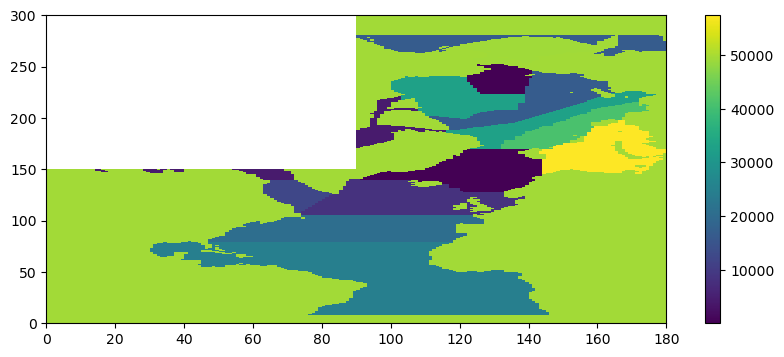

In [6]:
ind = ind.reshape(ny,nx)
plt.pcolormesh(get_aste_tracer(ind,nfx,nfy)[0])
# plt.xlim(140,180)
# plt.ylim(130,220)
plt.colorbar()

In [7]:
hf1 = mygrid['hFacC'][0] # top layer in z

landmsk = np.zeros((ny,nx))
landmsk[hf1 == 0] = 1
landmsk[hf1 == 1] = np.nan

In [8]:
# define the gates for the miniaste

# these are the indices we want to read from, but not write to
# at y = 186, we want -ADVy
x_bsoh = np.array([54, 54, 54, 54, 54])
x_bsov = np.array([0,  1,  2,  3,  4,  5,  6,  7,  8,  9])    # from Norway to Sp
y_bsoh = np.array([145, 146, 147, 148, 149])
y_bsov = np.array([186, 186, 186, 186, 186, 186, 186, 186, 186, 186])    # from Norway to Sp

x_spfjh = np.array([20,20,20,23,24,24,26,26])    # vertical gates from Sp to Fj as -x
y_spfjh = np.array([185,184,183,182,181,180,179,178])
x_spfjv = np.array([20,21,22,23,24,25,26])          # horizontal gates where we want to read -y
y_spfjv = np.array([183,183,183,183,182,180,180])

y_fjnzv = np.arange(165,175,1)
x_fjnzv = np.full_like(y_fjnzv,27)    # horizontal gate where we want to read -x

y_nzruv = np.arange(152,155,1)
x_nzruv = np.full_like(y_nzruv,12)   # horizontal gate where we want to read -x

In [9]:
# try to use rdmds
fileprefix = "/scratch3/atnguyen/aste_90x150x60/"
extBasin='run_template/input_maskTransport/'
filename = fileprefix + extBasin + "GATE_transports_v2_mskBasin.bin"
ind = np.fromfile(filename, dtype=np.int32)  # auto-reads .meta for shape/dtype/order
orig_shape = (ind.shape)

ind2d = ind.reshape(ny,nx)

mymsk = np.full((ny,nx),np.nan)
mymsk[ind2d == 57408.0] = 1

# make this smaller
mymsk[:,27:50] = np.nan
mymsk[:160,12:30] = np.nan
mymsk[160:163,15:30] = np.nan

ind = ind.reshape(ny,nx)
mymsk = np.full((ny,nx),np.nan)
mymsk[ind == 57408.0] = 1

# make this smaller
mymsk[:,27:50] = np.nan
mymsk[:160,12:30] = np.nan
mymsk[160:163,15:30] = np.nan

In [10]:
# T
boundsT = np.squeeze(rdmds(layers_path + "layers2TH")).ravel()
nT = boundsT.size - 1

# S
boundsS = np.squeeze(rdmds(layers_path + "layers1SLT")).ravel()
nS = boundsS.size - 1

# edges (same as bbb.boundsT / bbb.boundsS)
binsTH_edges = boundsT
binsSLT_edges = boundsS

# centers (same as bbb.binmidT / bbb.binmidS)
binsTH_centers = 0.5 * (binsTH_edges[:-1] + binsTH_edges[1:])
binsSLT_centers = 0.5 * (binsSLT_edges[:-1] + binsSLT_edges[1:])

# bin widths
binwidthT = binsTH_edges[1:] - binsTH_edges[:-1]
binwidthS = binsSLT_edges[1:] - binsSLT_edges[:-1]

# mid-widths (bbb.binwidthT1 / bbb.binwidthS1)
binwidthT1 = 0.5 * (binwidthT[1:] + binwidthT[:-1])
binwidthS1 = 0.5 * (binwidthS[1:] + binwidthS[:-1])

# same variable names as An
binmidT = binsTH_centers
binmidS = binsSLT_centers

In [11]:
# 2d
rac2d = read_float64(dirgrid + "RAC" + ".data")
print("RAC2d",rac2d.shape)

drf3d = read_float32(dirgrid + "DRF" + ".data")


rac2dtile = np.tile(rac2d,(nT-1,1)) #.shape

hf1flat = np.reshape(hf1,hf1.flatten().shape[0])
hf2d = hf1flat
hf2d[(hf2d > 0) & (hf2d < 1)] = 1
# hf2

hf2dtile = np.tile(hf2d,(nT-1,1))
ffac = 1e-6

RAC2d (40500,)
(100,)


## Load the G terms from layers

In [12]:
ffac=1e-6
G_T=np.array([])
metaT=parsemeta(layers_path + "diags/LAYERS/layers_3d_Ttend." + "0000000003" + ".meta")
nFldsT = metaT["fldList"]
print(len(nFldsT))
setTtend=nFldsT.copy()


# check for the correct diagnostics
metaT['fldList']   # 13, 14, 15, 16, 19, 22
b = metaT['fldList']
ifldT = np.array([1,2])    # surf, hDiff, vDiff, hADV, vADV, total tend
# print(np.array(b)[ifldT])  # for G_T

# remake the following to look for the existing terms and see if we can recreate
# ['LaTs2TH' 'LaTh2TH' 'LaTz2TH' 'LTha2TH' 'LTza2TH' 'LTto2TH']
ifldT = np.array([0,1,2,7,8,11])
print(np.array(b)[ifldT])  # for G_T

24
['LaTs2TH' 'LaTh2TH' 'LaTz2TH' 'LTha2TH' 'LTza2TH' 'LTto2TH']


In [13]:
# we need to also create the theta and salt bins for this area
tsstr = np.array(["0000000002","0000000003"])
t2 = int(tsstr[1]) # for the offline version

In [14]:
orig_shape = (ind.shape)
mymsk_1d = mymsk.reshape(orig_shape, order='C')
mymsk3d = np.tile(mymsk[np.newaxis,:,:],(nz,1,1))

mymsk_1d = mymsk.reshape(orig_shape, order='C')
mymsk_1dtile = np.tile(mymsk_1d[np.newaxis,:],(nT-1,1))

# mymsk3d.shape
# hf2dtile.shape
iwet_mine = np.where(~np.isnan(mymsk_1d))
iwet_mine[0].shape
iwet_mine = iwet_mine[0]   # this is already the 1D array of wetpoints to use, we can add these below by indexing

In [15]:
# get hf1 into the obcs to mask
mymsk_1dtile.shape
# hf2dtile.shape
np.nanmean(hf2dtile)

0.4

In [16]:
# make the G_T term
# we did not mask this or the other one which is why they are the same
# try to make sure we maskt this here.

name = "BarentsS"
G_T = {}
G_T[name] = {}
ts = tsstr[1]
    
# now loop through
G_T[name][ts] = {}
for i in range(len(ifldT)-1, -1, -1):
    tmp = read_float64_skip(layers_path + "diags/LAYERS/layers_3d_Ttend." + tsstr[-1] + ".data", nx*ny*(nT-1),ifldT[i])
    tmp = np.reshape(tmp,(nT-1,nx*ny))
    tmp = tmp * (rac2dtile * hf2dtile) #* ffac

    if i == ifldT.shape[0]-1:
        # if LTto2TH, do not remove from residual
        residT = tmp
    else:
        # else if vADV, hADV, vDiff, hDiff, surface, remove from residual
        residT = residT-tmp
    
    # just do the Barents Sea for this one
    a = np.nansum(tmp[:,:],axis=1)   # was iwet_mine
    G_T[name][ts][setTtend[ifldT[i]]] = a

# residT was wrong here so we can just ignore

In [17]:
hf1.shape

(450, 90)

## First show with DFh and DFr:

In [18]:
## do the advective convergence
file_name = "budg3d_hflux_set2"
meta_budg3d_hflux_set2 = parsemeta(dirdiags + file_name + "." + tsstr[0] + ".meta")
fldlist = np.array(meta_budg3d_hflux_set2["fldList"])
varnames = np.array(["DFxE_TH","DFyE_TH"])
recs = np.array([])
for var in varnames:
    irec = np.where(fldlist == var)
    recs = np.append(recs, irec[0][0])
DFxE_TH,its,meta = rdmds(os.path.join(dirdiags, file_name),t2,returnmeta=True,rec=recs[0])
DFyE_TH,its,meta = rdmds(os.path.join(dirdiags, file_name),t2,returnmeta=True,rec=recs[1])


# now 3d zfluxes
file_name = "budg3d_zflux_set1"
meta_budg3d_zflux_set1 = parsemeta(dirdiags + file_name + "." + tsstr[0] + ".meta")
fldlist = np.array(meta_budg3d_zflux_set1["fldList"])
varnames = np.array(["DFrE_TH","DFrI_TH"])
recs = np.array([])
for var in varnames:
    irec = np.where(fldlist == var)
    recs = np.append(recs, irec[0][0])
DFrE_TH,its,meta = rdmds(os.path.join(dirdiags, file_name),t2,returnmeta=True,rec=recs[0])
DFrI_TH,its,meta = rdmds(os.path.join(dirdiags, file_name),t2,returnmeta=True,rec=recs[1])
DFrE_TH = DFrE_TH.reshape(nz,ny,nx)
DFrI_TH = DFrI_TH.reshape(nz,ny,nx)

DF_hconv = calc_UV_conv_mod(nfx, nfy,get_aste_faces(DFxE_TH.reshape(nz, ny, nx), nfx, nfy),get_aste_faces(DFyE_TH.reshape(nz, ny, nx), nfx, nfy))
DF_hconv = DF_hconv #* hf   # degC·m^3/s at cell centers (matches: ff.DFh = ff.DFh .* hf)
DFh = DF_hconv * hf

trWtopDF = -(DFrE_TH+DFrI_TH)

DFr = np.zeros((nz,ny,nx),dtype=float)
DFr[:-1,:,:] = (trWtopDF[:-1] - trWtopDF[1:])

ValueError: operands could not be broadcast together with shapes (50,450,90) (50,1350,270) 

In [ ]:
hf.shape

## Load the ADV convergences from offline

In [ ]:
file_name = "budg3d_hflux_set2"
meta_budg3d_hflux_set2 = parsemeta(dirdiags + file_name + "." + tsstr[0] + ".meta")
fldlist = np.array(meta_budg3d_hflux_set2["fldList"])
varnames = np.array(["ADVx_TH","ADVy_TH"])
recs = np.array([])
for var in varnames:
    irec = np.where(fldlist == var)
    recs = np.append(recs, irec[0][0])
ADVx_TH,its,meta = rdmds(os.path.join(dirdiags, file_name),t2,returnmeta=True,rec=recs[0])
ADVy_TH,its,meta = rdmds(os.path.join(dirdiags, file_name),t2,returnmeta=True,rec=recs[1])

# now 3d zfluxes
file_name = "budg3d_zflux_set1"
meta_budg3d_zflux_set1 = parsemeta(dirdiags + file_name + "." + tsstr[0] + ".meta")
fldlist = np.array(meta_budg3d_zflux_set1["fldList"])
varnames = np.array(["ADVr_TH"])
recs = np.array([])
for var in varnames:
    irec = np.where(fldlist == var)
    recs = np.append(recs, irec[0][0])
ADVr_TH,its,meta = rdmds(os.path.join(dirdiags, file_name),t2,returnmeta=True,rec=recs[0])
ADVr_TH = ADVr_TH.reshape(nz,ny,nx)

hf = mygrid['hFacC']

ADV_hconv = calc_UV_conv_mod(nfx, nfy,get_aste_faces(ADVx_TH.reshape(nz, ny, nx), nfx, nfy),get_aste_faces(ADVy_TH.reshape(nz, ny, nx), nfx, nfy))
ADV_hconv = ADV_hconv * hf   # degC·m^3/s at cell centers (matches: ff.DFh = ff.DFh .* hf)
ADVh = ADV_hconv

trWtopADV = -(ADVr_TH)

ADVr = np.zeros((nz,ny,nx),dtype=float)
ADVr[:-1,:,:] = (trWtopADV[:-1] - trWtopADV[1:])  # this is not the way we did it in the original code but this is the way An has done it so we try

In [ ]:
# we need to also create the theta and salt bins for this area

# 'diags/state_3d_set1'
# read theta and salt averages from the t2 timestep (average)
file_name = "state_3d_set1"
meta_state_3d_set1 = parsemeta(dirstate + file_name + "." + tsstr[0] + ".meta")
fldlist = np.array(meta_state_3d_set1["fldList"])
varnames = np.array(["THETA","SALT"])
recs = np.array([])
for var in varnames:
    irec = np.where(fldlist == var)
    recs = np.append(recs, irec[0][0])
THETA,its,meta = rdmds(os.path.join(dirstate, file_name),t2,returnmeta=True,rec=recs[0])
SALT,its,meta = rdmds(os.path.join(dirstate, file_name),t2,returnmeta=True,rec=recs[1])

THETA = THETA.reshape(nz,ny,nx)
SALT = SALT.reshape(nz,ny,nx)

In [ ]:
G_T[name][ts].keys()

In [ ]:
G_online_advr = G_T[name][ts]['LTza2TH']
G_online_advh = G_T[name][ts]['LTha2TH']
G_online_dfr = G_T[name][ts]['LaTz2TH']
G_online_dfh = G_T[name][ts]['LaTh2TH']

In [ ]:
N_total = np.isfinite(T_flat).sum()
N_binned = Lijnew[0].sum()
print("Total finite cells:", N_total)
print("Total in bins:", N_binned, " (fraction:", N_binned / N_total, ")")

In [ ]:
# bbb.boundsT=squeeze(rdmds([dirrun 'layers2TH']))'; bbb.nT=length(bbb.boundsT)-1;
# bbb.boundsS=squeeze(rdmds([dirrun 'layers1SLT']))';bbb.nS=length(bbb.boundsS)-1;
# bbb.binwidthT=(bbb.boundsT(2:end)-bbb.boundsT(1:end-1));
# bbb.binwidthS=(bbb.boundsS(2:end)-bbb.boundsS(1:end-1));

# bbb.binwidthT1=0.5.*(bbb.binwidthT(2:end)+bbb.binwidthT(1:end-1)); %same as diff(bbb.binmidT)
# bbb.binwidthS1=0.5.*(bbb.binwidthS(2:end)+bbb.binwidthS(1:end-1)); %same as diff(bbb.binmidS)
# bbb.binmidT=(bbb.boundsT(2:end)+bbb.boundsT(1:end-1))./2;
# bbb.binmidS=(bbb.boundsS(2:end)+bbb.boundsS(1:end-1))./2;
# nT=bbb.nT;nS=bbb.nS;nTm1=bbb.nT-1;nSm1=bbb.nS-1;

# try to replicate exactly the An way
boundsT = np.squeeze(rdmds(layers_path + "layers2TH")).ravel()
nT = boundsT.size - 1
boundsS = np.squeeze(rdmds(layers_path + "layers1SLT")).ravel()
nS = boundsS.size - 1

binwidthT = boundsT[1:] - boundsT[:-1]
binwidthS = boundsS[1:] - boundsS[:-1]

binwidthT1 = 0.5 * (binwidthT[1:] + binwidthT[:-1])
binwidthS1 = 0.5 * (binwidthS[1:] + binwidthS[:-1])

binmidT = (boundsT[1:] + boundsT[:-1]) /2
binmidS = (boundsS[1:] + boundsS[:-1]) /2

nT = nT
nS = nS
nTm1 = nT-1
nSm1 = nS-1

In [90]:
hf1.shape
hf= np.tile(hf1[np.newaxis,:,:],(nz,1,1))

In [91]:

G_T_offline_new = np.zeros((4, nT-1))
dF_Tnew = np.zeros((4, nT-1))
Lijnew = np.zeros((4, nT-1), dtype=int)

# flatten the 3D arrays along all dimensions, as MATLAB’s tmp(:) does
T_flat    = np.ravel(THETA*hf, order='F')
ADVh_flat = np.ravel(ADVh*hf,  order='F')
ADRv_flat = np.ravel(ADVr*hf,  order='F')
DFh_flat  = np.ravel(DFh*hf,   order='F')
DFr_flat  = np.ravel(DFr*hf,   order='F')

for i in range(nT-1):
    # MATLAB: ij = find(tmp(:) >= bbb.binmidT(i) & tmp(:) < bbb.binmidT(i+1))
    ij = np.where((T_flat >= binmidT[i]) & (T_flat < binmidT[i + 1]))[0]
    Lijnew[0, i] = len(ij)

    if len(ij) > 0:
        # MATLAB: dF_Tnew(4,i)=sum(ff.advh(ij)); dF_Tnew(5,i)=sum(ff.advr(ij));
        dF_Tnew[0, i] = np.nansum(ADVh_flat[ij])
        dF_Tnew[1, i] = np.nansum(ADVr_flat[ij])
        dF_Tnew[2, i] = np.nansum(DFh_flat[ij])
        dF_Tnew[3, i] = np.nansum(DFr_flat[ij])

# MATLAB: G_T_offline_new = dF_Tnew ./ repmat(bbb.binwidthT1,[6 1])
G_T_offline_new = dF_Tnew / binwidthT1[None, :]

In [92]:
binmidT.shape

(112,)

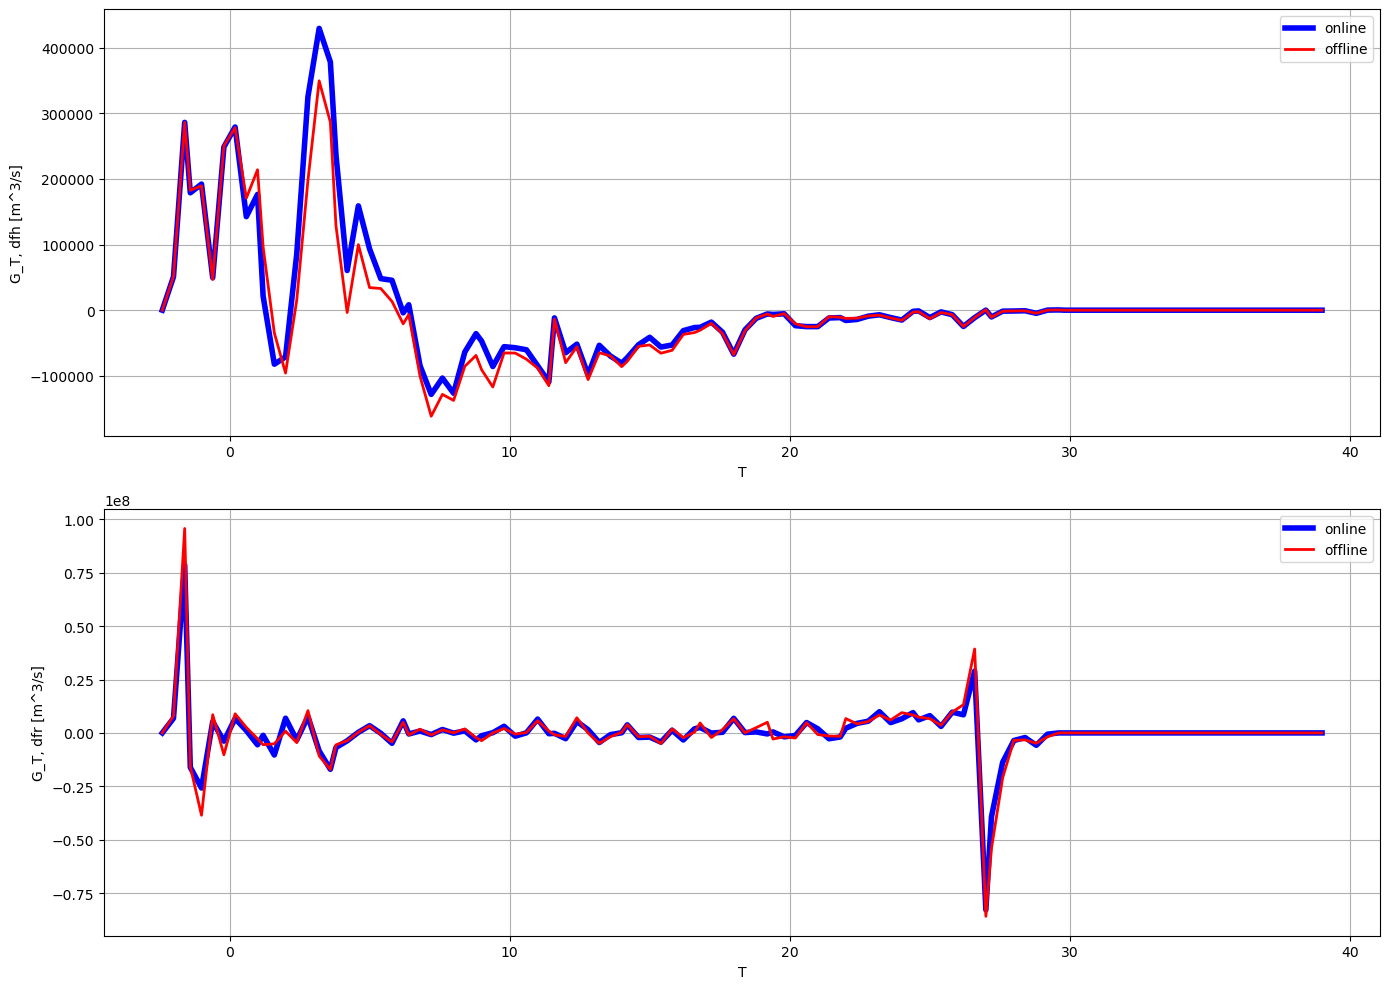

In [93]:
x = boundsT.flatten()[1:-1]

# --- plot: 2 rows, 1 column ---
plt.figure(figsize=(14, 10))
# Top: diffh
plt.subplot(2, 1, 1)
plt.plot(x, G_online_dfh, 'b-', linewidth=4, label='online')
plt.plot(x, G_T_offline_new[2], 'r-', linewidth=2, label='offline')
# a = 0.5 * (G_T_offline_new[2,1:] + G_T_offline_new[2,:-1])
# plt.plot(x[:-1], a, 'r-', linewidth=2, label='offline')

plt.grid(True); plt.xlabel('T'); plt.ylabel('G_T, dfh [m^3/s]')
plt.legend(); plt.axis('tight')

# Bottom: diffr
plt.subplot(2, 1, 2)
plt.plot(x, G_online_dfr, 'b-', linewidth=4, label='online')
plt.plot(x, G_T_offline_new[3], 'r-', linewidth=2, label='offline')
plt.grid(True); plt.xlabel('T'); plt.ylabel('G_T, dfr [m^3/s]')
plt.legend(); plt.axis('tight')

plt.tight_layout()


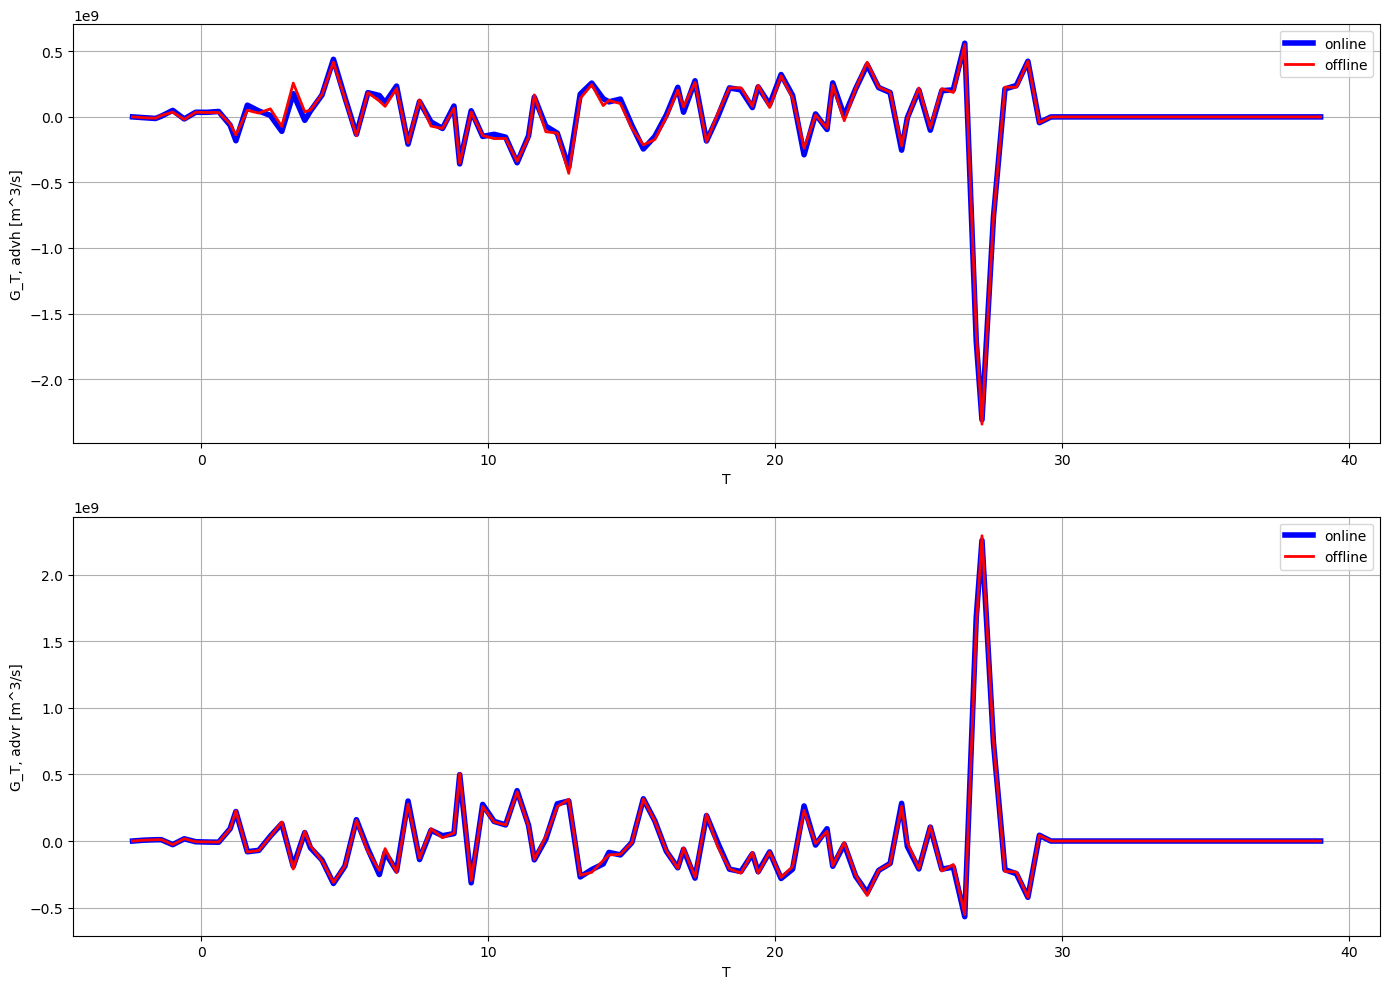

In [46]:
x = boundsT.flatten()[1:-1]

# --- plot: 2 rows, 1 column ---
plt.figure(figsize=(14, 10))
# Top: diffh
plt.subplot(2, 1, 1)
plt.plot(x, G_online_advh, 'b-', linewidth=4, label='online')
plt.plot(x, G_T_offline_new[0], 'r-', linewidth=2, label='offline')
plt.grid(True); plt.xlabel('T'); plt.ylabel('G_T, advh [m^3/s]')
plt.legend(); plt.axis('tight')

# Bottom: diffr
plt.subplot(2, 1, 2)
plt.plot(x, G_online_advr, 'b-', linewidth=4, label='online')
plt.plot(x, G_T_offline_new[1], 'r-', linewidth=2, label='offline')
plt.grid(True); plt.xlabel('T'); plt.ylabel('G_T, advr [m^3/s]')
plt.legend(); plt.axis('tight')

plt.tight_layout()


In [55]:

# We now assume that the input values (e.g., from data.layers)
# correspond to the *layer mean temperatures*, not isotherm edges.
# Hence, there are nT layers but only (nT - 1) interfaces where transport occurs.

G_T_offline_new = np.zeros((4, nT - 1))
dF_Tnew = np.zeros((4, nT - 1))
Lijnew = np.zeros((4, nT - 1), dtype=int)

# Flatten 3D arrays (nz, ny, nx) into 1D, matching MATLAB tmp(:)
T_flat = THETA.ravel()
ADVh_flat = ADVh.ravel()
ADVr_flat = ADVr.ravel()

# Loop over the (nT - 1) intervals between mean-T layers
for i in range(nT - 1):
    # Find indices where T lies between consecutive mean-T bins
    ij = np.where((T_flat >= binmidT[i]) & (T_flat < binmidT[i + 1]))[0]
    Lijnew[0, i] = len(ij)

    if len(ij) > 0:
        # Sum advective fluxes (degC·m³/s) across each T interval
        dF_Tnew[0, i] = np.nansum(ADVh_flat[ij])
        dF_Tnew[1, i] = np.nansum(ADVr_flat[ij])
        dF_Tnew[2, i] = np.nansum(DFh_flat[ij])
        dF_Tnew[3, i] = np.nansum(DFr_flat[ij])

# Convert layer-centered fluxes to edge-centered by dividing by ΔT
G_T_offline_new = dF_Tnew / binwidthT1[None, :]

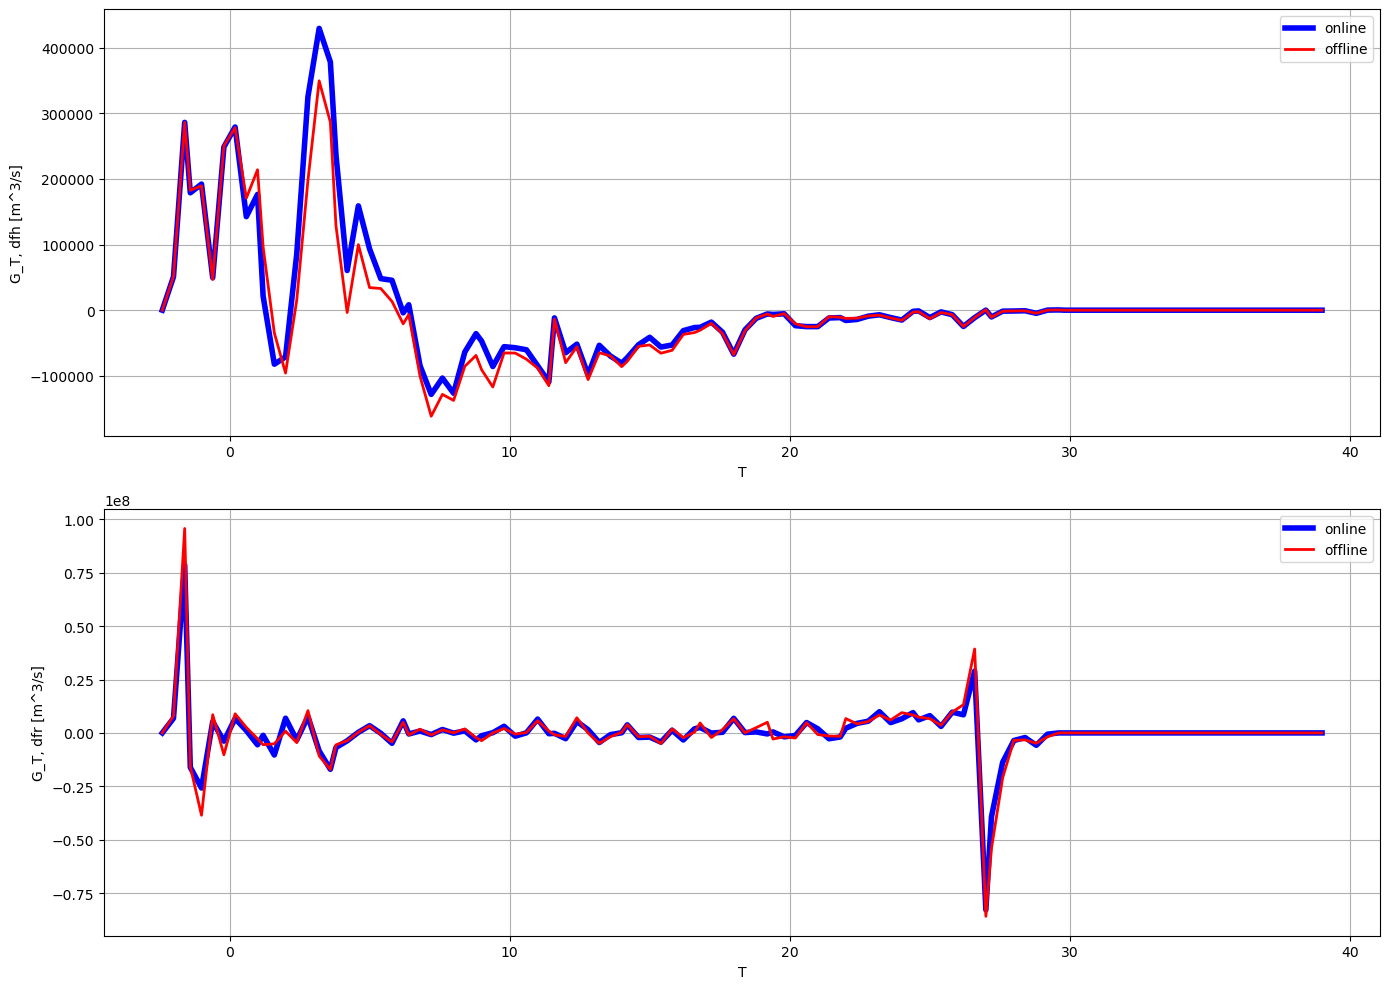

In [56]:
x = boundsT.flatten()[1:-1]

# --- plot: 2 rows, 1 column ---
plt.figure(figsize=(14, 10))
# Top: diffh
plt.subplot(2, 1, 1)
plt.plot(x, G_online_dfh, 'b-', linewidth=4, label='online')
plt.plot(x, G_T_offline_new[2], 'r-', linewidth=2, label='offline')
plt.grid(True); plt.xlabel('T'); plt.ylabel('G_T, dfh [m^3/s]')
plt.legend(); plt.axis('tight')

# Bottom: diffr
plt.subplot(2, 1, 2)
plt.plot(x, G_online_dfr, 'b-', linewidth=4, label='online')
plt.plot(x, G_T_offline_new[3], 'r-', linewidth=2, label='offline')
plt.grid(True); plt.xlabel('T'); plt.ylabel('G_T, dfr [m^3/s]')
plt.legend(); plt.axis('tight')

plt.tight_layout()


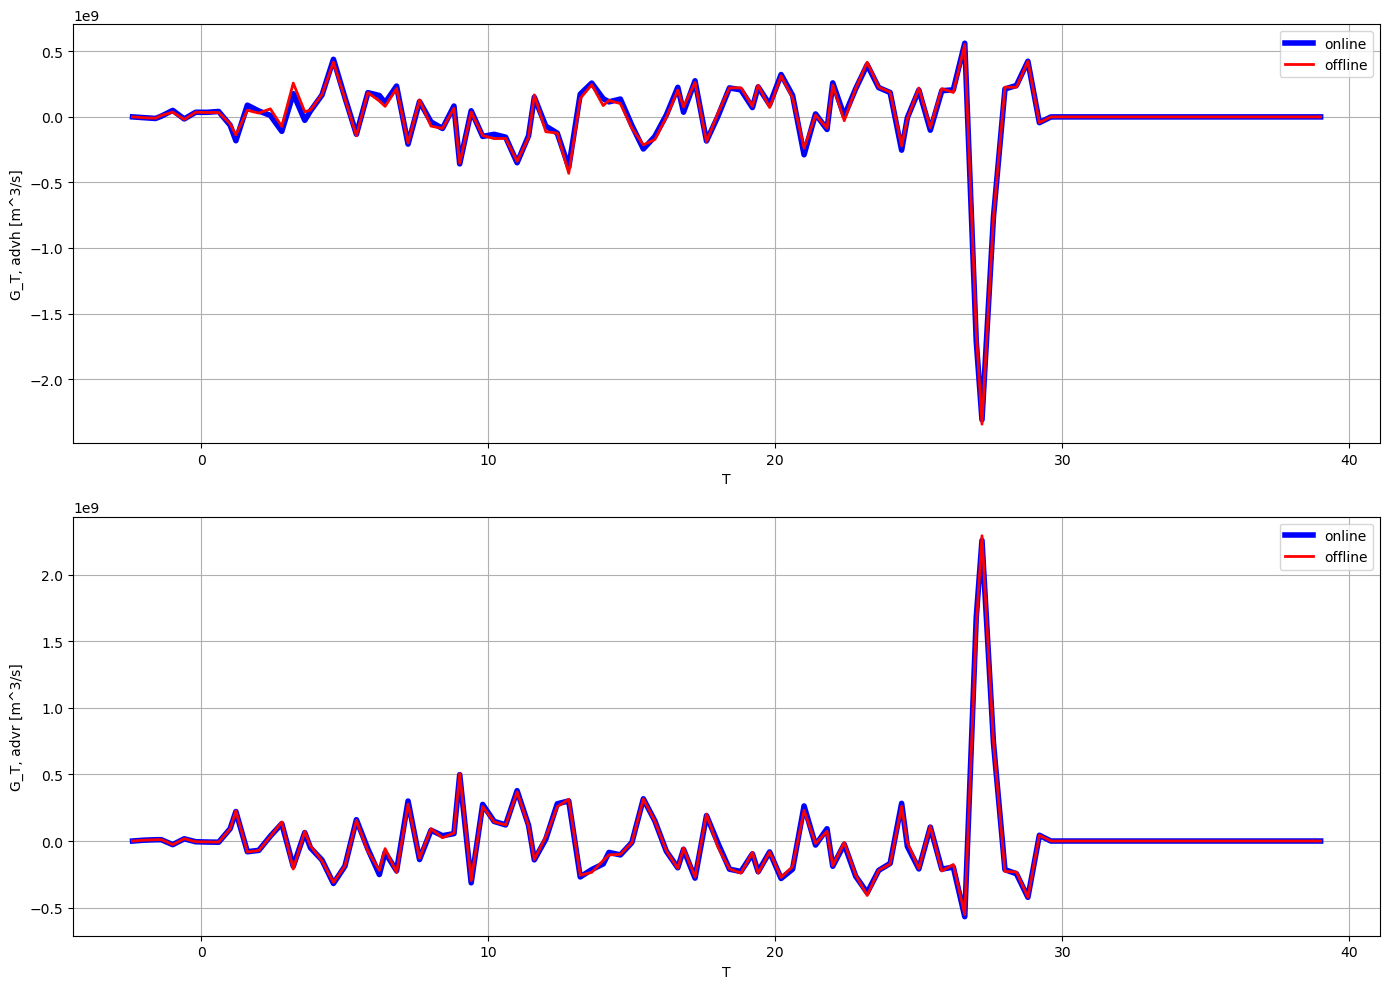

In [48]:
x = boundsT.flatten()[1:-1]

# --- plot: 2 rows, 1 column ---
plt.figure(figsize=(14, 10))
# Top: diffh
plt.subplot(2, 1, 1)
plt.plot(x, G_online_advh, 'b-', linewidth=4, label='online')
plt.plot(x, G_T_offline_new[0], 'r-', linewidth=2, label='offline')
plt.grid(True); plt.xlabel('T'); plt.ylabel('G_T, advh [m^3/s]')
plt.legend(); plt.axis('tight')

# Bottom: diffr
plt.subplot(2, 1, 2)
plt.plot(x, G_online_advr, 'b-', linewidth=4, label='online')
plt.plot(x, G_T_offline_new[1], 'r-', linewidth=2, label='offline')
plt.grid(True); plt.xlabel('T'); plt.ylabel('G_T, advr [m^3/s]')
plt.legend(); plt.axis('tight')

plt.tight_layout()


In [83]:
import numpy as np

# THETA, DFh, DFr, ADVh, ADVr: shape (nz, ny, nx)
# binmidT: 1D array of bin midpoints, length nT
# binwidthT1: 1D array of ΔT between edges, length nT-1

nz, ny, nx = THETA.shape
nT = len(binmidT)
nTm1 = nT - 1

# We keep 4 rows: [DFh, DFr, ADVh, ADVr]
G_T_offline_new = np.zeros((4, nTm1))
dF_Tnew = np.zeros((4, nTm1))
Lijnew = np.zeros((4, nTm1), dtype=int)

# Flatten full 3D fields, like tmp(:) in MATLAB
# (order='C' or 'F' is fine as long as it's the same for all)
T_flat    = THETA.ravel()
DFh_flat  = DFh.ravel()
DFr_flat  = DFr.ravel()
ADVh_flat = ADVh.ravel()
ADVr_flat = ADVr.ravel()

for i in range(nTm1):
    # MATLAB: ij = find(tmp(:) >= bbb.binmidT(i) & tmp(:) < bbb.binmidT(i+1));
    ij = np.where((T_flat >= binmidT[i]) & (T_flat < binmidT[i + 1]))[0]
    Lijnew[0, i] = ij.size  # store count in first row

    if ij.size > 0:
        # Correspondence to An's dF_Tnew rows:
        #  DFh → row 0  (MATLAB index 2)
        #  DFr → row 1  (MATLAB index 3)
        # ADVh → row 2  (MATLAB index 4)
        # ADVr → row 3  (MATLAB index 5)
        dF_Tnew[0, i] = np.nansum(DFh_flat[ij])
        dF_Tnew[1, i] = np.nansum(DFr_flat[ij])
        dF_Tnew[2, i] = np.nansum(ADVh_flat[ij])
        dF_Tnew[3, i] = np.nansum(ADVr_flat[ij])

# Now convert dF_Tcenter to G_T at T-edges by dividing by ΔT_edge (binwidthT1)
# MATLAB: G_T_offline_new = dF_Tnew ./ repmat(bbb.binwidthT1,[6 1]);
G_T_offline_new = dF_Tnew / binwidthT1[None, :]


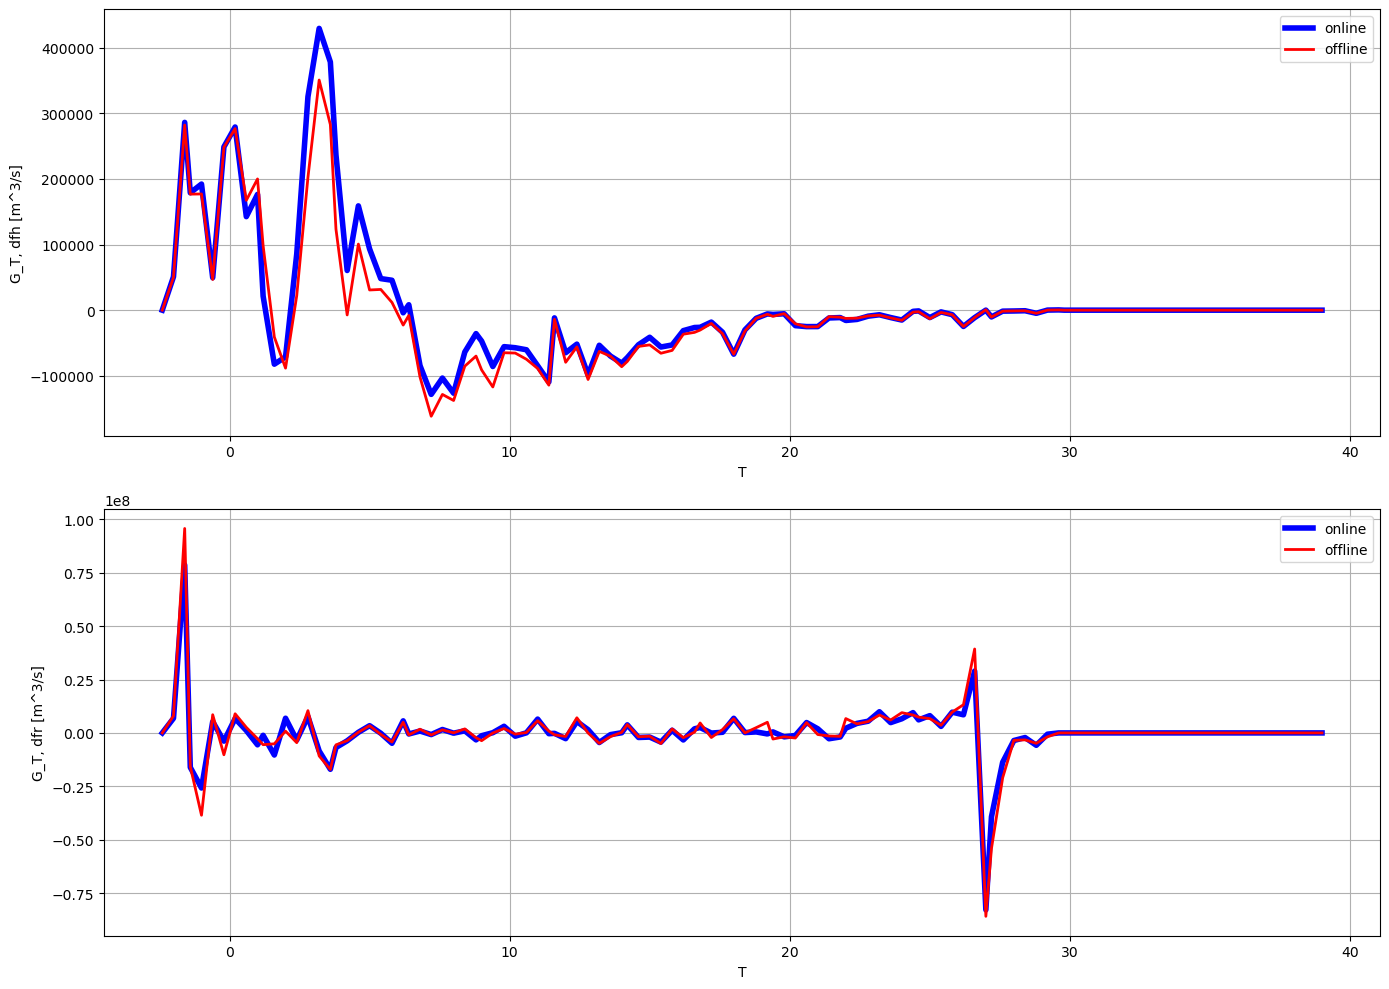

In [85]:
x = boundsT.flatten()[1:-1]

# --- plot: 2 rows, 1 column ---
plt.figure(figsize=(14, 10))
# Top: diffh
plt.subplot(2, 1, 1)
plt.plot(x, G_online_dfh, 'b-', linewidth=4, label='online')
plt.plot(x, G_T_offline_new[0], 'r-', linewidth=2, label='offline')
plt.grid(True); plt.xlabel('T'); plt.ylabel('G_T, dfh [m^3/s]')
plt.legend(); plt.axis('tight')

# Bottom: diffr
plt.subplot(2, 1, 2)
plt.plot(x, G_online_dfr, 'b-', linewidth=4, label='online')
plt.plot(x, G_T_offline_new[1], 'r-', linewidth=2, label='offline')
plt.grid(True); plt.xlabel('T'); plt.ylabel('G_T, dfr [m^3/s]')
plt.legend(); plt.axis('tight')

plt.tight_layout()
